## 1. What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.

This data is available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values.

Find the mean height, the standard deviation of height, and the president who is the smallest and tallest.

You can use `pandas` to read in the file if you want, then cast the column to a `np.array`

In [13]:
import pandas as pd 
import numpy as np

#reads the file
data=pd.read_csv('data/president_heights.csv')

#the array of all the names
name=np.array(data['name'])

#array of the heights 
Height=np.array(data['height(cm)'])

#Mean value of the heitghts
mean_Height=np.mean(Height)
print(F'Mean height:{mean_Height} cm ')


#the standard deviation of height
std_height=np.std(Height)
print(F'std:{std_height}')

#arguments of maximum value 
argmax=np.argmax(Height)

#arguments of minimim value 
argmin=np.argmin(Height)

print(F'Tallest president is {name[argmax]} with {Height[argmax]} cm ')
print(F'Smallest president is {name[argmin]} with {Height[argmin]} cm ')


Mean height:179.73809523809524 cm 
std:6.931843442745892
Tallest president is Abraham Lincoln with 193 cm 
Smallest president is James Madison with 163 cm 


# Exercise 2

Recall the polynomial formula

$$
p(x) = a_0 + a_1 x + a_2 x^2 + \cdots a_N x^N = \sum_{n=0}^N a_n x^n \tag{1}
$$

In the **math functions workshop**, you wrote a simple function `p(x, coeff)` to evaluate it without thinking about efficiency.

Now write a new function that does the same job, but uses NumPy arrays and array operations for its computations, rather than any form of Python loop.

(This is already implemented in `np.poly1d`, but use that only to test your function)

- Hint: Use `np.cumprod()`  


In [14]:
import numpy as np 
def p1(x,coef):
    coef=np.array(coef)
    power=np.arange(0,len(coef),1)
    p_x=np.sum(coef*x**power)
    return p_x

# With comprod()

def p_2(x,coef):
    coef=np.array(coef)
    arr_x=np.zeros(len(coef))+x
    arr_x[0]=1
    arr_x=np.cumprod(arr_x)
    return np.sum(arr_x*coef)
    
print(p_2(5,[1,5,0,2]))
print(p1(5,[1,5,0,2]))


p = np.poly1d([2,0,5,1])
print(p(5))
   


276.0
276
276


## Exercise 3 Softmax

Read in `data/iris.csv` and compute the [softmax]() of the sepal length. The formula for the softmax function $\sigma(x)$ for a vector $x = \{x_0, x_1, ..., x_{n-1}\}$ is
    .$$\sigma(x)_j = \frac{e^{x_j}}{\sum_k e^{x_k}}$$


Your result should be equal to the output of `scipy.special.softmax`

In [15]:
from scipy.special import softmax


#reads the file
data=pd.read_csv('data/iris.csv')

# Sepallenght array 
SL=np.array(data['sepallength'])

#softmax formula
sigma=np.exp(SL)/(np.sum(np.exp(SL)))

print(sigma)


[0.00221959 0.00181724 0.00148783 0.00134625 0.00200836 0.00299613
 0.00134625 0.00200836 0.00110221 0.00181724 0.00299613 0.00164431
 0.00164431 0.00099732 0.0044697  0.00404435 0.00299613 0.00221959
 0.00404435 0.00221959 0.00299613 0.00221959 0.00134625 0.00221959
 0.00164431 0.00200836 0.00200836 0.00245302 0.00245302 0.00148783
 0.00164431 0.00299613 0.00245302 0.00331123 0.00181724 0.00200836
 0.00331123 0.00181724 0.00110221 0.00221959 0.00200836 0.00121813
 0.00110221 0.00200836 0.00221959 0.00164431 0.00221959 0.00134625
 0.00271101 0.00200836 0.01483991 0.00814432 0.01342771 0.00331123
 0.00900086 0.00404435 0.00736928 0.00181724 0.00994749 0.00245302
 0.00200836 0.00493978 0.0054593  0.00603346 0.00365948 0.01099368
 0.00365948 0.0044697  0.006668   0.00365948 0.00493978 0.00603346
 0.00736928 0.00603346 0.00814432 0.00994749 0.01214989 0.01099368
 0.0054593  0.00404435 0.00331123 0.00331123 0.0044697  0.0054593
 0.00299613 0.0054593  0.01099368 0.00736928 0.00365948 0.00331

## Exercise 4: unique counts


Compute the counts of unique values row-wise.

Input:
```
np.random.seed(100)
arr = np.random.randint(1,11,size=(6, 10))
arr
> array([[ 9,  9,  4,  8,  8,  1,  5,  3,  6,  3],
>        [ 3,  3,  2,  1,  9,  5,  1, 10,  7,  3],
>        [ 5,  2,  6,  4,  5,  5,  4,  8,  2,  2],
>        [ 8,  8,  1,  3, 10, 10,  4,  3,  6,  9],
>        [ 2,  1,  8,  7,  3,  1,  9,  3,  6,  2],
>        [ 9,  2,  6,  5,  3,  9,  4,  6,  1, 10]])
```
Desired Output:
```
> [[1, 0, 2, 1, 1, 1, 0, 2, 2, 0],
>  [2, 1, 3, 0, 1, 0, 1, 0, 1, 1],
>  [0, 3, 0, 2, 3, 1, 0, 1, 0, 0],
>  [1, 0, 2, 1, 0, 1, 0, 2, 1, 2],
>  [2, 2, 2, 0, 0, 1, 1, 1, 1, 0],
>  [1, 1, 1, 1, 1, 2, 0, 0, 2, 1]]
```
Output contains 10 columns representing numbers from 1 to 10. The values are the counts of the numbers in the respective rows.
For example, Cell(0,2) has the value 2, which means, the number 3 occurs exactly 2 times in the 1st row.

In [16]:
np.random.seed(100)
arr = np.random.randint(1,11,size=(6, 10))

#copy of the original arr
arr1=np.copy(arr)

#get the number of columns 
n_col=np.shape(arr)[1]

#get the number of row 
n_row=np.shape(arr)[0]

n=np.arange(1,11,1)

for j in range(n_row):
    for i in range(n_col):
        arr[j,i]=len(np.where(arr1[j,:]==n[i])[0])


print(arr)

[[1 0 2 1 1 1 0 2 2 0]
 [2 1 3 0 1 0 1 0 1 1]
 [0 3 0 2 3 1 0 1 0 0]
 [1 0 2 1 0 1 0 2 1 2]
 [2 2 2 0 0 1 1 1 1 0]
 [1 1 1 1 1 2 0 0 2 1]]


In [17]:
# I tried to make the question above without any loop 
# not done
'''
np.random.seed(100)
arr = np.random.randint(1,11,size=(6, 10))


n_col=np.shape(arr)[1]
n_row=np.shape(arr)[0]
col_val=np.arange(1,n_col+1)
a=np.zeros([n_col,n_row,n_col])+arr
np.sum(a==col_val[:],axis=2).T
np.reshape(col_val, 10)
'''

'\nnp.random.seed(100)\narr = np.random.randint(1,11,size=(6, 10))\n\n\nn_col=np.shape(arr)[1]\nn_row=np.shape(arr)[0]\ncol_val=np.arange(1,n_col+1)\na=np.zeros([n_col,n_row,n_col])+arr\nnp.sum(a==col_val[:],axis=2).T\nnp.reshape(col_val, 10)\n'

## Exercise 5: One-Hot encodings

Compute the one-hot encodings (AKA dummy binary variables) for each unique value in the array.

Input:
```
np.random.seed(101) 
arr = np.random.randint(1,4, size=6)
arr
#> array([2, 3, 2, 2, 2, 1])
```
Output:
```
#> array([[ 0.,  1.,  0.],
#>        [ 0.,  0.,  1.],
#>        [ 0.,  1.,  0.],
#>        [ 0.,  1.,  0.],
#>        [ 0.,  1.,  0.],
#>        [ 1.,  0.,  0.]])
```

In [18]:
np.random.seed(101) 
arr = np.random.randint(1,4, size=6)

Max=np.max(arr)
Min=np.min(arr)
mid=np.median(arr)

a=np.array([Min,mid,Max])
result=np.empty([6,3])
for i in range(np.shape(arr)[0]):
    result[i,:]=arr[i]==a

result

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

## Exercise 6

Let `q` be a NumPy array of length `n` with `q.sum() == 1`.

Suppose that `q` represents a [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function) over a statistical distribution. Recall that a distribution is an array of probabilities of events.

We want to generate a discrete random variable $ x $ such that $ \mathbb P\{x = i\} = q_i $.

In other words, `x` takes values in `range(len(q))` and `x = i` with probability `q[i]`.

The standard (inverse transform) algorithm is as follows:

- Divide the unit interval $ [0, 1] $ into $ n $ subintervals $ I_0, I_1, \ldots, I_{n-1} $ such that the length of $ I_i $ is $ q_i $.  
- Draw a uniform random variable $ U $ on $ [0, 1] $ and return the $ i $ such that $ U \in I_i $.  


The probability of drawing $ i $ is the length of $ I_i $, which is equal to $ q_i $.

We can implement the algorithm as follows

```python
from random import uniform

def sample(q):
    a = 0.0
    U = uniform(0, 1)
    for i in range(len(q)):
        if a < U <= a + q[i]:
            return i
        a = a + q[i]
```

If you can’t see how this works, try thinking through the flow for a simple example, such as `q = [0.25, 0.75]`
It helps to sketch the intervals on paper.

**Your exercise is to speed it up using NumPy, avoiding explicit loops**

- Hint: Use `np.searchsorted` and `np.cumsum`  


If you can, implement the functionality as a class called `DiscreteRV`, where

- the data for an instance of the class is the vector of probabilities `q`  
- the class has a `draw()` method, which returns one draw according to the algorithm described above  


If you can, write the method so that `draw(k)` returns `k` draws from `q`.

In [19]:
from random import uniform
import numpy as np
def sample(q):
    a = 0.0
    U = uniform(0, 1)
    for i in range(len(q)):
        
        if a < U <= a + q[i]:
            
            return i
        a = a + q[i]



def VectDiscreteRV(list):

    arr_q=np.array(list)
    arr_aq=np.cumsum(arr_q)

    arr_a=np.zeros(len(q))
    arr_a[1:]=arr_aq[:-1]

    U = uniform(0, 1)

    return np.searchsorted(arr_aq,U)

q = [0.5, 0.5]
print(VectDiscreteRV(q))






1


In [20]:
class DiscreteRV:
    
    def __init__(self,list):
        self.q=list
        arr_q=np.array(self.q)
        arr_aq=np.cumsum(arr_q)

        arr_a=np.zeros(len(self.q))
        arr_a[1:]=arr_aq[:-1]

        U = uniform(0, 1)
        self.i=np.searchsorted(arr_aq,U)

    def draw(self,k=None):
        if k==None:
            k=1
        draws=[]
        j=0
        while j!=k:
            
            draws.append(DiscreteRV(self.q).i)
            j+=1
        return draws

q = [0.1,0.4,0.6]
L=DiscreteRV(q)
a=L.draw(20)
print(*a)



2 1 2 0 1 2 1 2 0 2 1 1 2 1 1 1 1 1 1 1


## Exercise 7 Peaks

Find all the peaks in a 1D numpy array a. Peaks are points surrounded by smaller values on both sides.

Input:
```
a = np.array([1, 3, 7, 1, 2, 6, 0, 1])
```
Desired Output:
```
#> array([2, 5])
```
where, 2 and 5 are the positions of peak values 7 and 6.

### 1. Solve this usign a regular python for loop

### 2. Solve this using no loops and only numpy functions

In [21]:
# 1. Solve this usign a regular python for loop

import matplotlib.pyplot as plt

aa = np.array([1, 3, 7, 1, 2, 6, 0, 1])

ind=[]
for i in range(1,len(aa)-1):
    if (aa[i]>aa[i-1]) and (aa[i]>aa[i+1]):
        ind.append(i)

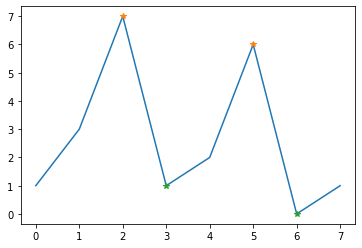

In [22]:
#2. Solve this using no loops and only numpy functions


def arg_peaks_valey_vect(arr):
    '''
    This fonction finds the indices of the peaks 
    and valleys in a 1D numpy array 
    '''
    a1=arr[1:-1]
    a2=arr[:-2]
    a3=arr[2:]

    peak1=a1-a2

    peak2=a1-a3
    #np.diff np.sign

    peaks=np.where((peak1>0)*(peak2>0))[0]+1
    valley=np.where((peak1<0)*(peak2<0))[0]+1
    return peaks,valley


arg_peak,arg_Valley=arg_peaks_valey_vect(aa)

x=np.arange(0,len(aa),1)


plt.plot(x,aa)

plt.plot(x[arg_peak],aa[arg_peak],'*')
plt.plot(x[arg_Valley],aa[arg_Valley],'*')

plt.show()
